In [1]:
import pandas as pd
import numpy as np
import os
import sys
import random
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from itertools import product

sys.path.extend([
                    '../src',
                    '../data',
                ])

from utils import run_nested_cv_3a

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], ignore_index=True)

architecture = {
               'num_filters': [50, 25],
               'filter_sizes': [5, 5],
               'pool_sizes': [5, 5]
               }

CPU


2025-07-09 22:42:14.190312: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a857d90>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a857160>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x300a468b0>, 'optimizer': 'adam'} with score: 0.248


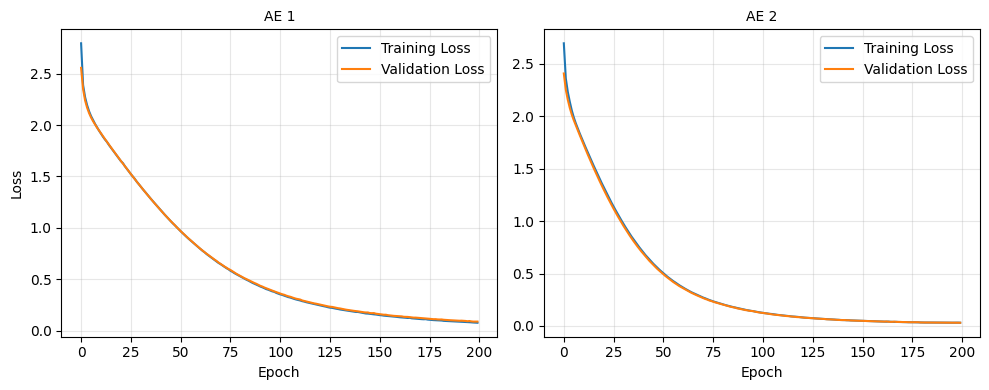

Limb: 2 Subject: 1 Youden Index: 0.10292558829764675 Sensitivity: 0.9905660377358491 Specificity: 0.11235955056179775
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a857d90>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a857160>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x300a468b0>, 'optimizer': 'adam'} with score: 0.239


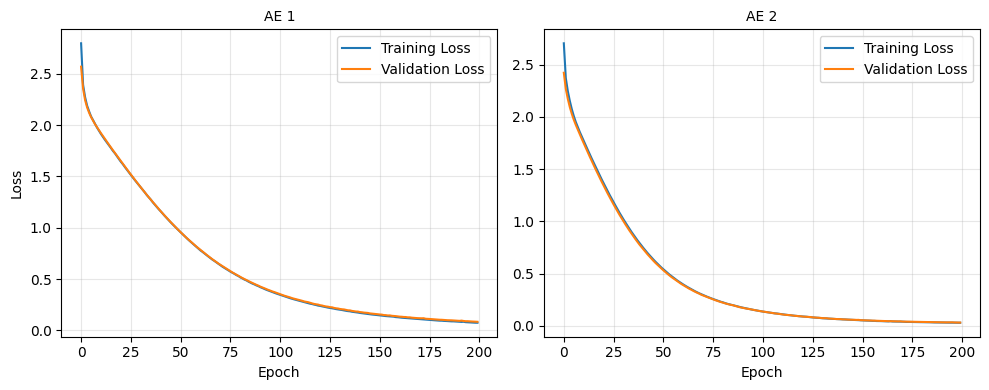

Limb: 2 Subject: 2 Youden Index: 0.19880597014925372 Sensitivity: 0.96 Specificity: 0.23880597014925373
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a857d90>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a857160>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x300a468b0>, 'optimizer': 'adam'} with score: 0.174


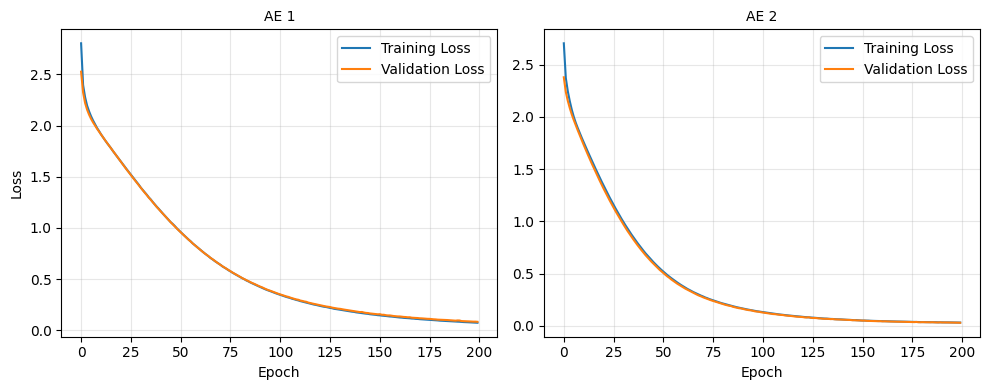

Limb: 2 Subject: 3 Youden Index: 0.22777777777777786 Sensitivity: 0.9166666666666666 Specificity: 0.3111111111111111
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a857d90>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a857160>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x300a468b0>, 'optimizer': 'adam'} with score: 0.242


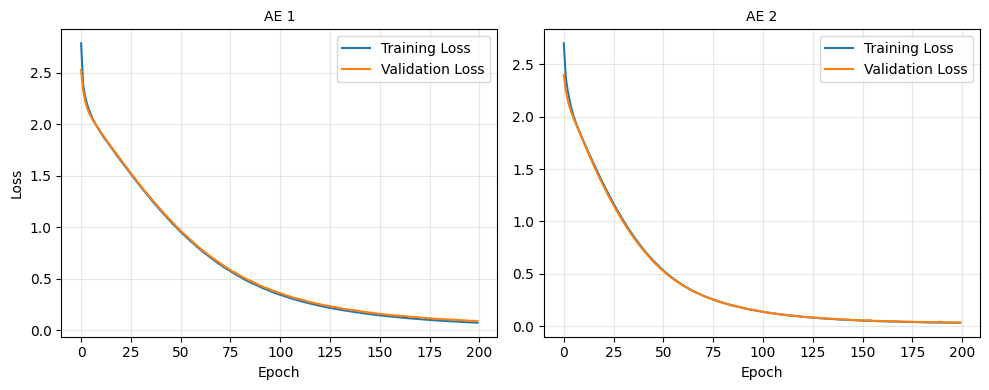

Limb: 2 Subject: 4 Youden Index: 0.2987012987012987 Sensitivity: 1.0 Specificity: 0.2987012987012987
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a857d90>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a857160>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x300a468b0>, 'optimizer': 'adam'} with score: 0.256


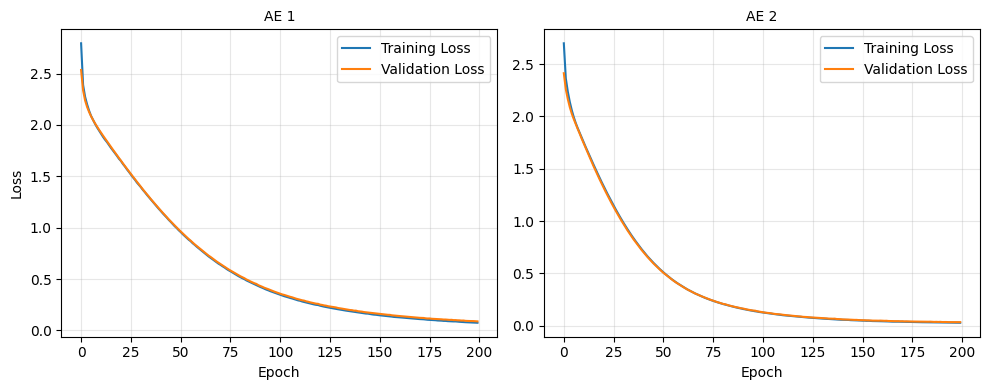

Limb: 2 Subject: 5 Youden Index: 0.28401639344262297 Sensitivity: 0.9590163934426229 Specificity: 0.325
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a857d90>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a857160>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x300a468b0>, 'optimizer': 'adam'} with score: 0.264


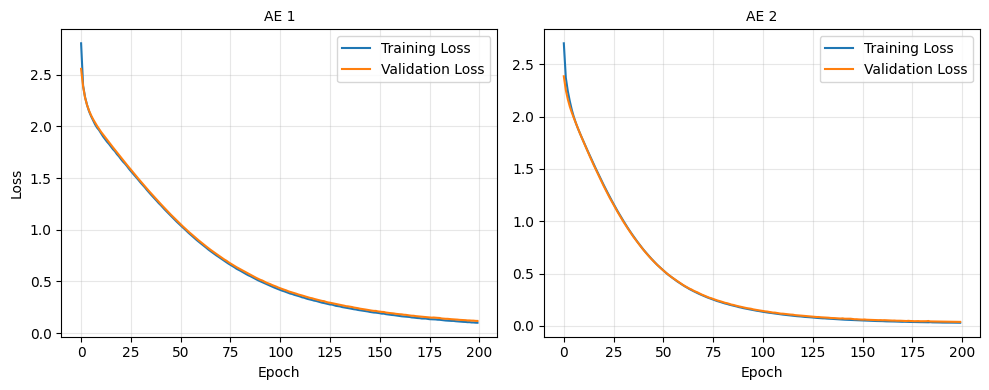

Limb: 2 Subject: 6 Youden Index: 0.0999624906226555 Sensitivity: 0.9709302325581395 Specificity: 0.12903225806451613
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a857d90>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a857160>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x300a468b0>, 'optimizer': 'adam'} with score: 0.303


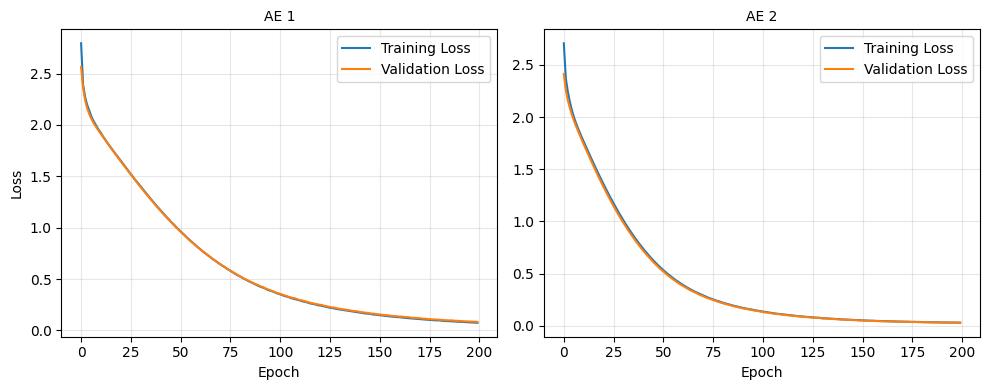

Limb: 2 Subject: 7 Youden Index: 0.06684981684981683 Sensitivity: 0.5833333333333334 Specificity: 0.4835164835164835
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a857d90>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a857160>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x300a468b0>, 'optimizer': 'adam'} with score: 0.277


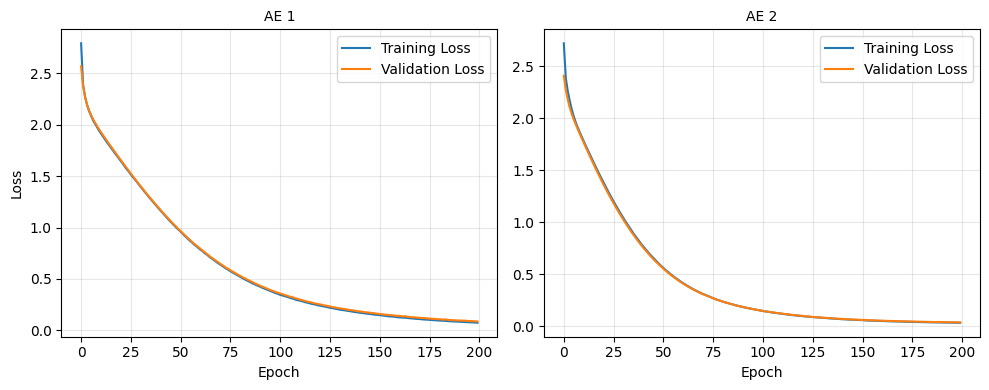

Limb: 2 Subject: 8 Youden Index: 0.23717948717948723 Sensitivity: 0.75 Specificity: 0.48717948717948717
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a857d90>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a857160>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x300a468b0>, 'optimizer': 'adam'} with score: 0.212


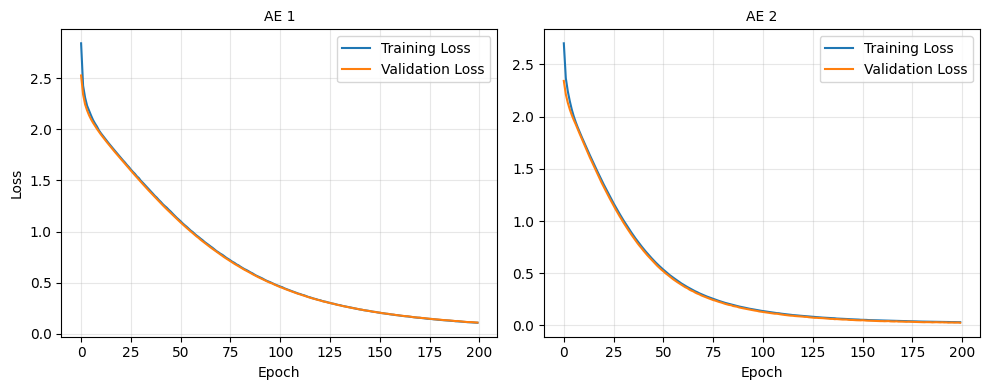

Limb: 2 Subject: 9 Youden Index: 0.05164319248826299 Sensitivity: 1.0 Specificity: 0.051643192488262914
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a857d90>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a857160>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x300a468b0>, 'optimizer': 'adam'} with score: 0.297


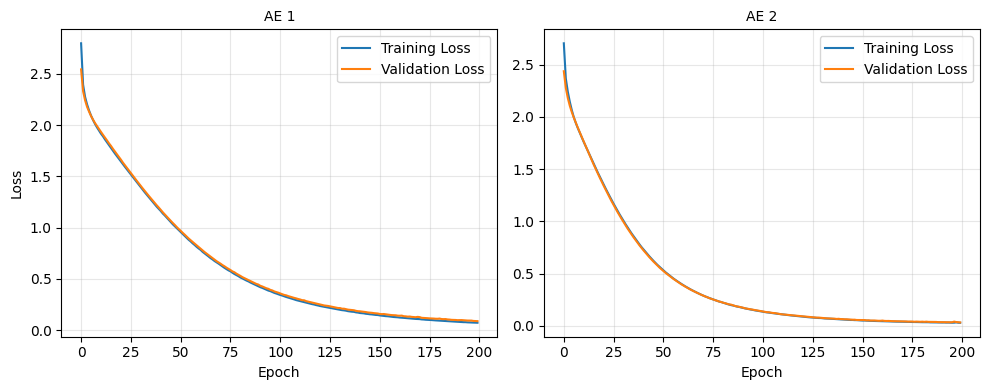

Limb: 2 Subject: 10 Youden Index: 0.24339300937766417 Sensitivity: 0.9492753623188406 Specificity: 0.29411764705882354
0.18112550248864867 0.08743351224930089


In [2]:

approach = 3
filename = f'../results/approach3a/limb_nested_cv_left.csv'

window_size = 100
epochs = 200
batch_size = 32
class_loss = False
plot_hist = False

error_func = 'mae'

X = left[['ax', 'ay', 'az']]
y = left['gnd']
subjects = left['subject']
limbs = left['limb']

hp = {
        'activation': ['tanh'],
        'kernel_init': [tf.keras.initializers.HeNormal(seed=42), ],
        'bias_init': [tf.keras.initializers.Zeros()],
        'optimizer':['adam'],
        'loss': [tf.keras.losses.mean_squared_error,],
        'learning_rate': [ 0.0001],
        'batch_norm': [True]
    }

results_3a = run_nested_cv_3a(window_size,             
                              X=X,                         
                              y=y,                        
                              subjects=subjects,           
                              limbs=limbs,                      
                              architecture=architecture,   
                              hp_grid=hp,
                              epochs=epochs,                  
                              batch_size=batch_size,              
                              class_loss=False,           
                              plot_hist=True,            
                              error_func='None')

print(np.mean(results_3a['youden_index']), np.std(results_3a['youden_index']))